In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix, matthews_corrcoef

In [14]:
str_results = pd.read_csv("../03_Structural_models/structural_model_held_out_test_results.csv")
str_results["Features"] ="str_results"
phy_results = pd.read_csv("../04_Physicochemical_models/physicochemical_model_held_out_test_results.csv")
phy_results["Features"] ="phy_results"
img_results = pd.read_csv("../05_Cell_Painting_models/cellpainting_model_held_out_test_results.csv")
img_results["Features"] ="img_results"
ge_results = pd.read_csv("../06_LINCSL1000_models/LINCSL1000_model_held_out_test_results.csv")
ge_results["Features"] ="ge_results"
go_results = pd.read_csv("../07_GO_models/GO_model_held_out_test_results.csv")
go_results["Features"] ="go_results"
pid_results = pd.read_csv("../08_PIDGINv4_models/PIDGINv4_model_held_out_test_results.csv") 
pid_results["Features"] ="pid_results"
moa_results = pd.read_csv("../09_MOA_models/MOA_model_held_out_test_results.csv") 
moa_results["Features"] ="moa_results"

In [15]:
allresults = pd.concat([str_results, phy_results, img_results, ge_results, go_results, pid_results, 
                        moa_results]).sort_values(["Dataset", "Features", "SMILES"],
                                                  ascending=[False, False, False]).reset_index(drop=True)
allresults

,Dataset,Actviity,SMILES,True_Value,Prediction,Probability,Best_Threshold,Features
0,sider_cardiacdisorders,Cardiac disorders,c1ccc2c(CC3=[NH+]CCN3)cccc2c1,0,1,0.574822,0.516513,str_results
1,sider_cardiacdisorders,Cardiac disorders,[O-]c1ccc(C2C[NH2+]CCc3c2cc([O-])c([O-])c3Cl)cc1,1,1,0.535648,0.516513,str_results
2,sider_cardiacdisorders,Cardiac disorders,[NH3+]C(Cc1cc(I)c(Oc2cc(I)c([O-])c(I)c2)c(I)c1...,1,1,0.490015,0.516513,str_results
3,sider_cardiacdisorders,Cardiac disorders,OCC[NH+]1CC[NH+](CCCN2c3ccccc3Sc3ccc(C(F)(F)F)...,1,1,0.741655,0.516513,str_results
4,sider_cardiacdisorders,Cardiac disorders,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,1,1,0.638864,0.516513,str_results
...,...,...,...,...,...,...,...,...
3424,DICTrank,DICTrank,CC(=O)N=c1[n-]nc(S(N)(=O)=O)s1,0,0,0.750346,0.816086,ge_results
3425,DICTrank,DICTrank,CC(=O)CC(c1ccccc1)c1c([O-])c2ccccc2oc1=O,0,1,0.799535,0.816086,ge_results
3426,DICTrank,DICTrank,C=CC[NH+]1CCC23c4c5ccc([O-])c4OC2C(=O)CCC3(O)C1C5,1,0,0.814075,0.816086,ge_results
3427,DICTrank,DICTrank,C=CC1=C(C(=O)[O-])[NH+]2C(=O)C(=NC(=O)C([NH2+]...,0,0,0.780211,0.816086,ge_results


In [16]:
def scale_probability(prob, threshold):
    if prob <= threshold:
        return prob / (2 * threshold)
    else:
        return 1 - (1 - prob) / (2 * (1 - threshold))

allresults['Scaled_Probability'] = allresults.apply(lambda row: scale_probability(row['Probability'], row['Best_Threshold']), axis=1)
allresults

,Dataset,Actviity,SMILES,True_Value,Prediction,Probability,Best_Threshold,Features,Scaled_Probability
0,sider_cardiacdisorders,Cardiac disorders,c1ccc2c(CC3=[NH+]CCN3)cccc2c1,0,1,0.574822,0.516513,str_results,0.560300
1,sider_cardiacdisorders,Cardiac disorders,[O-]c1ccc(C2C[NH2+]CCc3c2cc([O-])c([O-])c3Cl)cc1,1,1,0.535648,0.516513,str_results,0.519788
2,sider_cardiacdisorders,Cardiac disorders,[NH3+]C(Cc1cc(I)c(Oc2cc(I)c([O-])c(I)c2)c(I)c1...,1,1,0.490015,0.516513,str_results,0.474349
3,sider_cardiacdisorders,Cardiac disorders,OCC[NH+]1CC[NH+](CCCN2c3ccccc3Sc3ccc(C(F)(F)F)...,1,1,0.741655,0.516513,str_results,0.732831
4,sider_cardiacdisorders,Cardiac disorders,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,1,1,0.638864,0.516513,str_results,0.626530
...,...,...,...,...,...,...,...,...,...
3424,DICTrank,DICTrank,CC(=O)N=c1[n-]nc(S(N)(=O)=O)s1,0,0,0.750346,0.816086,ge_results,0.459722
3425,DICTrank,DICTrank,CC(=O)CC(c1ccccc1)c1c([O-])c2ccccc2oc1=O,0,1,0.799535,0.816086,ge_results,0.489860
3426,DICTrank,DICTrank,C=CC[NH+]1CCC23c4c5ccc([O-])c4OC2C(=O)CCC3(O)C1C5,1,0,0.814075,0.816086,ge_results,0.498768
3427,DICTrank,DICTrank,C=CC1=C(C(=O)[O-])[NH+]2C(=O)C(=NC(=O)C([NH2+]...,0,0,0.780211,0.816086,ge_results,0.478020


In [17]:
allresults.Dataset.unique()

array(['sider_cardiacdisorders', 'cardiotox_with_sider_inactives',
       'cardiotox_with_sider_all', 'cardiotox_with_sider_actives',
       'DICTrank'], dtype=object)

In [18]:
features_list = ['str_results','phy_results', 'moa_results', 'pid_results', 
       'img_results', 'go_results', 'ge_results']

sider_cardiacdisorders
str_results
133
pid_results
133
phy_results
133
moa_results
111
img_results
133
go_results
133
ge_results
133


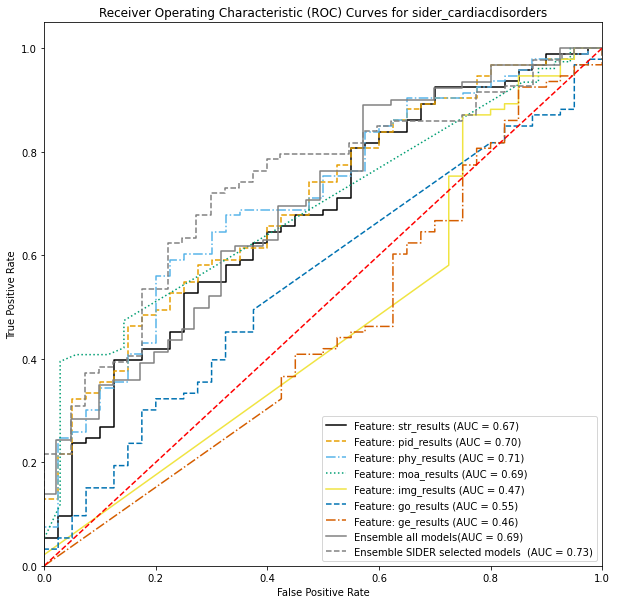

cardiotox_with_sider_inactives
str_results
90
pid_results
90
phy_results
90
moa_results
90
img_results
90
go_results
90
ge_results
90


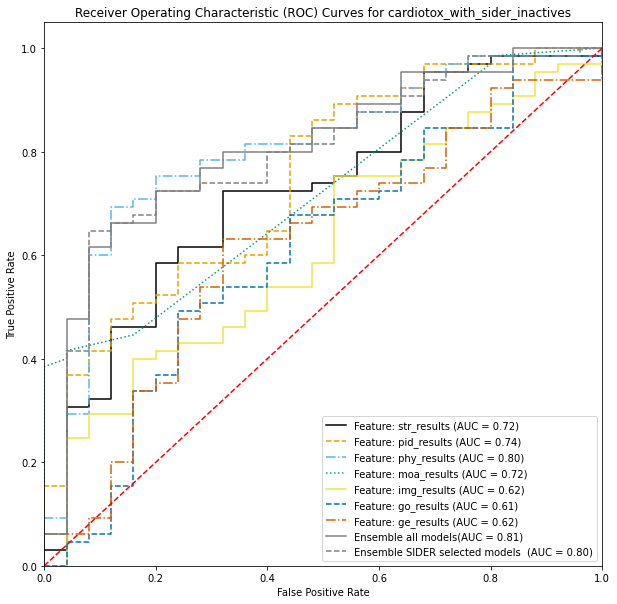

cardiotox_with_sider_all
str_results
90
pid_results
90
phy_results
90
moa_results
90
img_results
90
go_results
90
ge_results
90


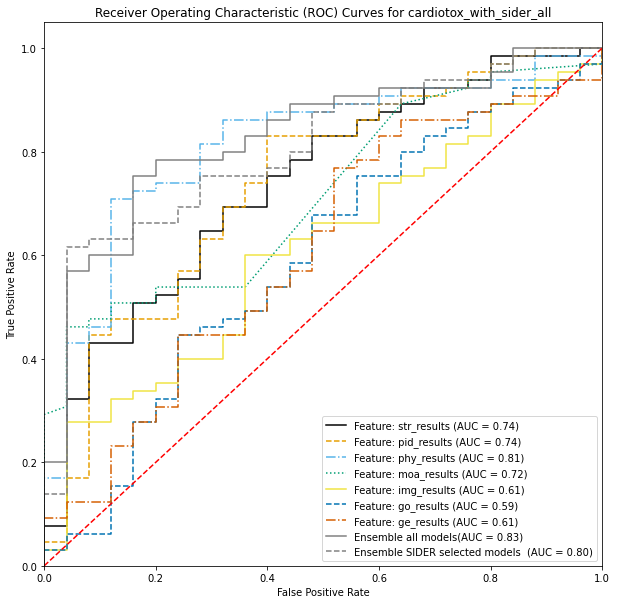

cardiotox_with_sider_actives
str_results
90
pid_results
90
phy_results
90
moa_results
90
img_results
90
go_results
90
ge_results
90


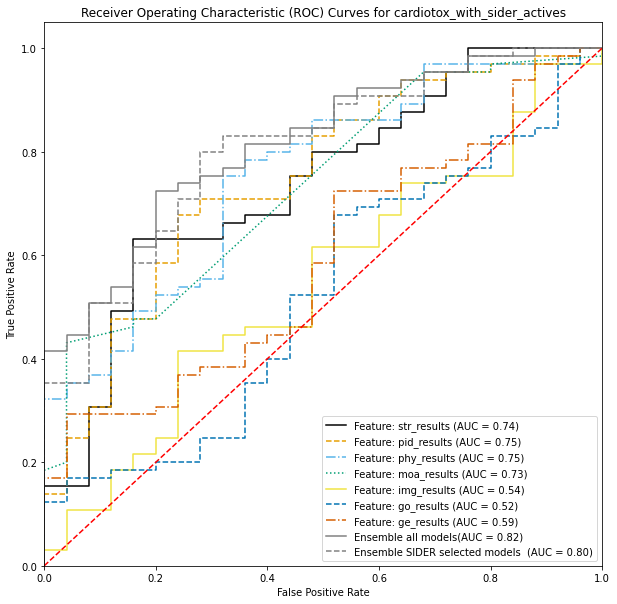

DICTrank
str_results
90
pid_results
90
phy_results
90
moa_results
90
img_results
90
go_results
90
ge_results
90


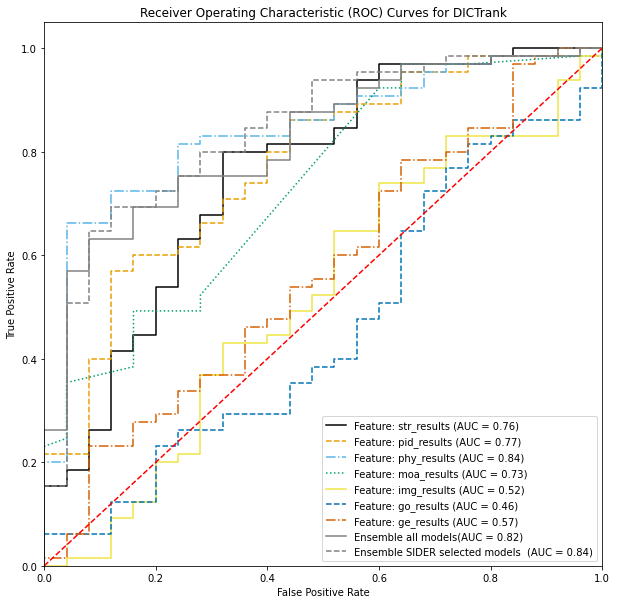

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Define a colorblind-friendly palette and line styles
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#9467bd"] 

line_styles = ['solid', 'dashed', 'dashdot', 'dotted']

# Loop through each dataset
for dataset in ['sider_cardiacdisorders', 'cardiotox_with_sider_inactives',
       'cardiotox_with_sider_all', 'cardiotox_with_sider_actives',
       'DICTrank']:
    print(dataset)
    df_dataset = allresults[allresults["Dataset"] == dataset]
    
    plt.figure(figsize=(10, 10))
    
    # For each unique feature in the dataset, plot the AUC curve
    for idx, feature in enumerate(df_dataset["Features"].unique()):
        print(feature)
        df_feature = df_dataset[df_dataset["Features"] == feature]
        print(len(df_feature))
        fpr, tpr, _ = roc_curve(df_feature["True_Value"], df_feature["Probability"])
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'Feature: {feature} (AUC = {roc_auc:.2f})', 
                 color=palette[idx % len(palette)],
                 linestyle=line_styles[idx % len(line_styles)])
    
    # Ensemble_ALL
    grouped = df_dataset.groupby('SMILES')
    # Collect ensemble predictions
    ensemble_proba_dict = {}


    # Iterate over each unique SMILES
    for smiles, group in grouped:
        # Mean of the scaled probabilities
        #ensemble_proba = group['Scaled_Probability'].median()
        ensemble_proba = group['Scaled_Probability'].mean()
        ensemble_proba_dict[smiles] = ensemble_proba


    # Convert ensemble_proba_dict to a list corresponding to the original order in df_dataset
    ensemble_probabilities = df_dataset['SMILES'].map(ensemble_proba_dict).tolist()

    # Convert ensemble_proba_dict to ensemble predictions based on threshold
    ensemble_predictions_dict = {smiles: (1 if proba > 0.5 else 0) for smiles, proba in ensemble_proba_dict.items()}
    ensemble_predictions = df_dataset['SMILES'].map(ensemble_predictions_dict).tolist()

    fpr, tpr, _ = roc_curve(df_dataset["True_Value"], ensemble_probabilities)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Ensemble all models(AUC = {roc_auc:.2f})', color='gray')
    
    ensemble_predictions_df = pd.DataFrame(ensemble_predictions_dict.items(), columns=['SMILES', 'Prediction'])
    ensemble_predictions_df['Dataset'] = dataset
    ensemble_predictions_df['Features'] = "Ensemble_all"
    ensemble_predictions_df.to_csv(f"Ensemble_all_{dataset}.csv", index=False)
    
    
    # Ensemble_selected
    for smiles, group in grouped:
        # Mean of the scaled probabilities
        #ensemble_proba = group['Scaled_Probability'].median()
        ensemble_proba = group[group.Features.isin(["str_results", "pid_results", 
                               "phy_results", "moa_results"])]['Scaled_Probability'].mean()
        ensemble_proba_dict[smiles] = ensemble_proba

    # Convert ensemble_proba_dict to a list corresponding to the original order in df_dataset
    ensemble_probabilities = df_dataset['SMILES'].map(ensemble_proba_dict).tolist()

    # Convert ensemble_proba_dict to ensemble predictions based on threshold
    ensemble_predictions_dict = {smiles: (1 if proba > 0.5 else 0) for smiles, proba in ensemble_proba_dict.items()}
    ensemble_predictions = df_dataset['SMILES'].map(ensemble_predictions_dict).tolist()

    fpr, tpr, _ = roc_curve(df_dataset["True_Value"], ensemble_probabilities)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Ensemble SIDER selected models  (AUC = {roc_auc:.2f})', color='gray', linestyle='dashed' )
    
    ensemble_predictions_df = pd.DataFrame(ensemble_predictions_dict.items(), columns=['SMILES', 'Prediction'])
    ensemble_predictions_df['Dataset'] = dataset
    ensemble_predictions_df['Features'] = "Ensemble_selected"
    ensemble_predictions_df.to_csv(f"Ensemble_selected_{dataset}.csv", index=False)
    
    # Aesthetics for the plot
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curves for {dataset}')
    plt.legend(loc='lower right')
    plt.show()


In [31]:
df_dataset

,Dataset,Actviity,SMILES,True_Value,Prediction,Probability,Best_Threshold,Features,Scaled_Probability
2799,DICTrank,DICTrank,OCCOCC[NH+]1CC[NH+](C(c2ccccc2)c2ccc(Cl)cc2)CC1,1,1,0.638441,0.549585,str_results,0.598638
2800,DICTrank,DICTrank,OC(c1cc(C(F)(F)F)nc2c(C(F)(F)F)cccc12)C1CCCC[N...,1,1,0.653451,0.549585,str_results,0.615300
2801,DICTrank,DICTrank,OC(Cn1cncn1)(Cn1cncn1)c1ccc(F)cc1F,1,0,0.538468,0.549585,str_results,0.489886
2802,DICTrank,DICTrank,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,1,1,0.619788,0.549585,str_results,0.577932
2803,DICTrank,DICTrank,O=C1[N-]C(=O)C(c2ccccc2)(c2ccccc2)N1,1,1,0.539547,0.549585,str_results,0.490868
...,...,...,...,...,...,...,...,...,...
3424,DICTrank,DICTrank,CC(=O)N=c1[n-]nc(S(N)(=O)=O)s1,0,0,0.750346,0.816086,ge_results,0.459722
3425,DICTrank,DICTrank,CC(=O)CC(c1ccccc1)c1c([O-])c2ccccc2oc1=O,0,1,0.799535,0.816086,ge_results,0.489860
3426,DICTrank,DICTrank,C=CC[NH+]1CCC23c4c5ccc([O-])c4OC2C(=O)CCC3(O)C1C5,1,0,0.814075,0.816086,ge_results,0.498768
3427,DICTrank,DICTrank,C=CC1=C(C(=O)[O-])[NH+]2C(=O)C(=NC(=O)C([NH2+]...,0,0,0.780211,0.816086,ge_results,0.478020


sider_cardiacdisorders
Balanced Accuracy (BA): 0.57
Sensitivity (Sen): 0.94
Specificity (Spe): 0.20
F1 Score: 0.82
Matthews Correlation Coefficient (MCC): 0.22
0.6941267565242328


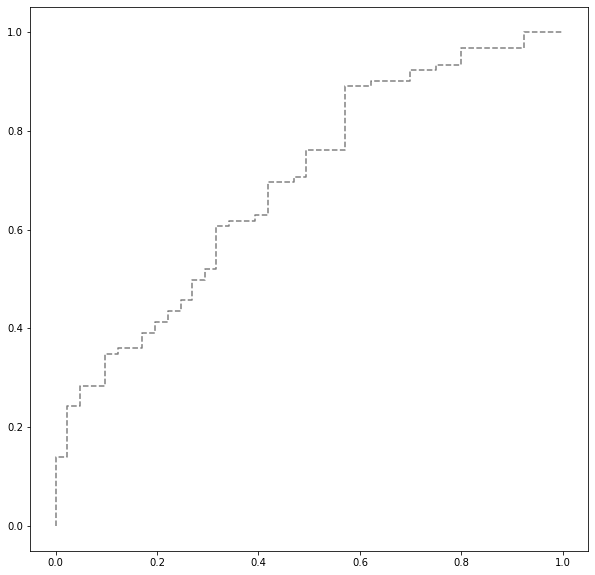

cardiotox_with_sider_inactives
Balanced Accuracy (BA): 0.63
Sensitivity (Sen): 0.91
Specificity (Spe): 0.36
F1 Score: 0.84
Matthews Correlation Coefficient (MCC): 0.32
0.8055384615384616


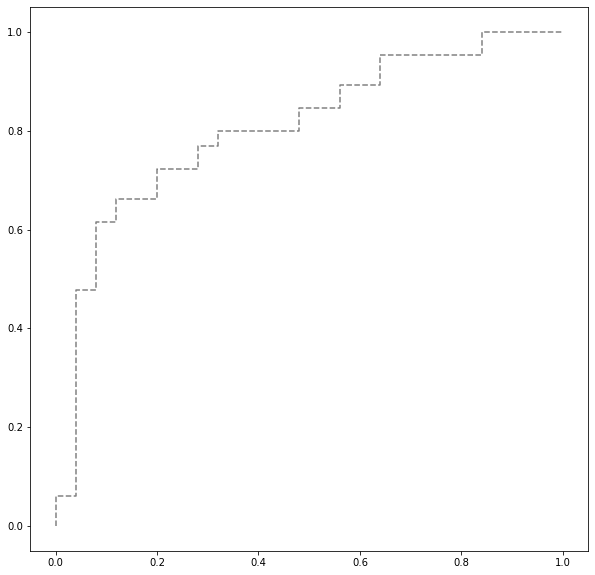

cardiotox_with_sider_all
Balanced Accuracy (BA): 0.73
Sensitivity (Sen): 0.86
Specificity (Spe): 0.60
F1 Score: 0.85
Matthews Correlation Coefficient (MCC): 0.47
0.8295384615384616


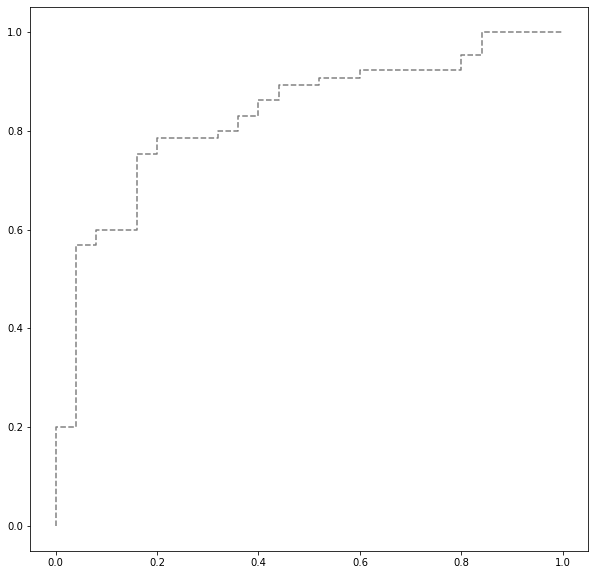

cardiotox_with_sider_actives
Balanced Accuracy (BA): 0.68
Sensitivity (Sen): 0.85
Specificity (Spe): 0.52
F1 Score: 0.83
Matthews Correlation Coefficient (MCC): 0.38
0.8153846153846154


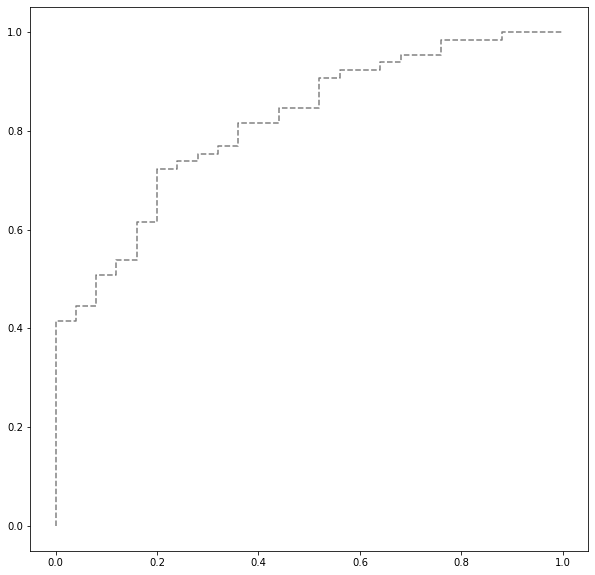

DICTrank
Balanced Accuracy (BA): 0.66
Sensitivity (Sen): 0.97
Specificity (Spe): 0.36
F1 Score: 0.88
Matthews Correlation Coefficient (MCC): 0.45
0.8239999999999998


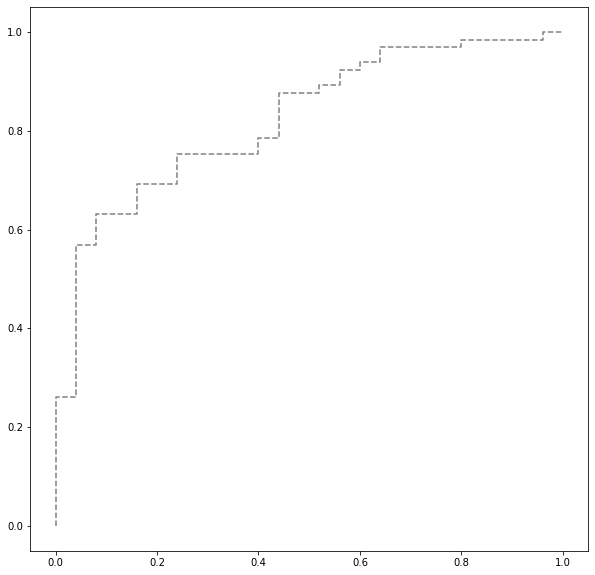

In [38]:
#Hard Voting

from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix, matthews_corrcoef

# Loop through each dataset
for dataset in ['sider_cardiacdisorders', 'cardiotox_with_sider_inactives',
       'cardiotox_with_sider_all', 'cardiotox_with_sider_actives',
       'DICTrank']:
    print(dataset)
    df_dataset = allresults[allresults["Dataset"] == dataset]
    
    plt.figure(figsize=(10, 10))
    
    # Group by SMILES
    grouped = df_dataset.groupby('SMILES')

    # Collect ensemble predictions
    ensemble_probabilities_dict = {}

   # Iterate over each unique SMILES
    for smiles, group in grouped:
        # Mean of the scaled probabilities
        #ensemble_proba = group['Scaled_Probability'].median()
        ensemble_proba = group['Scaled_Probability'].mean()
        ensemble_proba_dict[smiles] = ensemble_proba


    # Convert ensemble_proba_dict to a list corresponding to the original order in df_dataset
    ensemble_probabilities = df_dataset['SMILES'].map(ensemble_proba_dict).tolist()

    # Convert ensemble_proba_dict to ensemble predictions based on threshold
    ensemble_predictions_dict = {smiles: (1 if proba > 0.5 else 0) for smiles, proba in ensemble_proba_dict.items()}
    ensemble_predictions = df_dataset['SMILES'].map(ensemble_predictions_dict).tolist()

    # Assuming the ensemble_predictions list and df_dataset["True_Value"] have been generated from the previous code...

    # Balanced Accuracy (BA)
    ba = balanced_accuracy_score(df_dataset["True_Value"], ensemble_predictions)
    # Sensitivity (Sen) & Specificity (Spe)
    tn, fp, fn, tp = confusion_matrix(df_dataset["True_Value"], ensemble_predictions).ravel()
    sen = tp / (tp + fn)
    spe = tn / (tn + fp)
    # F1 score
    f1 = f1_score(df_dataset["True_Value"], ensemble_predictions)
    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(df_dataset["True_Value"], ensemble_predictions)

    print(f"Balanced Accuracy (BA): {ba:.2f}")
    print(f"Sensitivity (Sen): {sen:.2f}")
    print(f"Specificity (Spe): {spe:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

    fpr, tpr, _ = roc_curve(df_dataset["True_Value"], ensemble_probabilities)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Ensemble All models (AUC = {roc_auc:.2f})', color='gray', linestyle='dashed' )

    print(roc_auc)
    plt.show()

sider_cardiacdisorders
Balanced Accuracy (BA): 0.68
Sensitivity (Sen): 0.79
Specificity (Spe): 0.58
F1 Score: 0.80
Matthews Correlation Coefficient (MCC): 0.36
0.7341382277028964


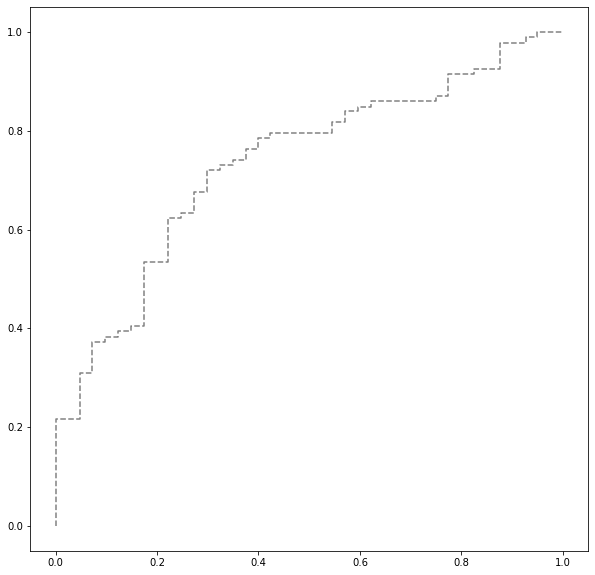

cardiotox_with_sider_inactives
Balanced Accuracy (BA): 0.71
Sensitivity (Sen): 0.74
Specificity (Spe): 0.68
F1 Score: 0.79
Matthews Correlation Coefficient (MCC): 0.39
0.7950769230769231


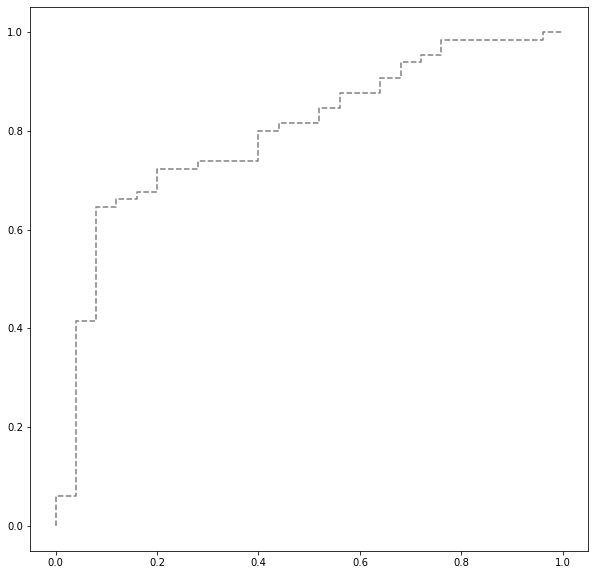

cardiotox_with_sider_all
Balanced Accuracy (BA): 0.73
Sensitivity (Sen): 0.66
Specificity (Spe): 0.80
F1 Score: 0.76
Matthews Correlation Coefficient (MCC): 0.41
0.8043076923076924


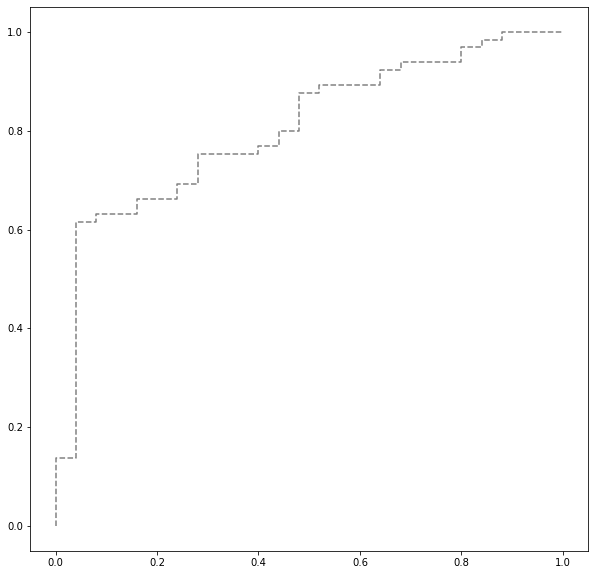

cardiotox_with_sider_actives
Balanced Accuracy (BA): 0.67
Sensitivity (Sen): 0.89
Specificity (Spe): 0.44
F1 Score: 0.85
Matthews Correlation Coefficient (MCC): 0.37
0.804923076923077


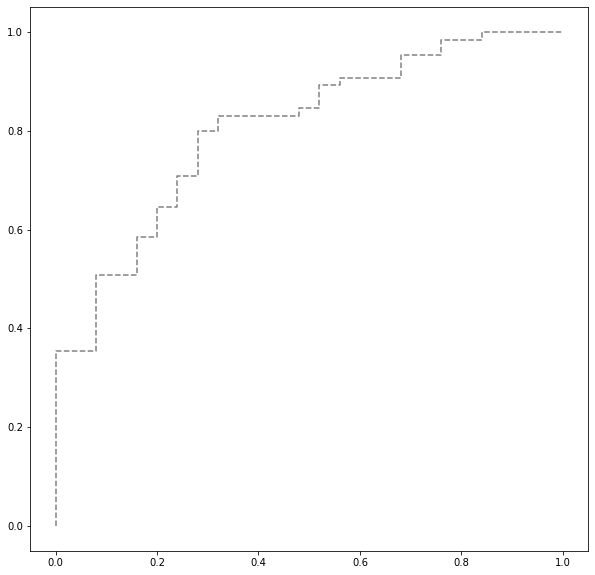

DICTrank
Balanced Accuracy (BA): 0.74
Sensitivity (Sen): 0.88
Specificity (Spe): 0.60
F1 Score: 0.86
Matthews Correlation Coefficient (MCC): 0.49
0.84


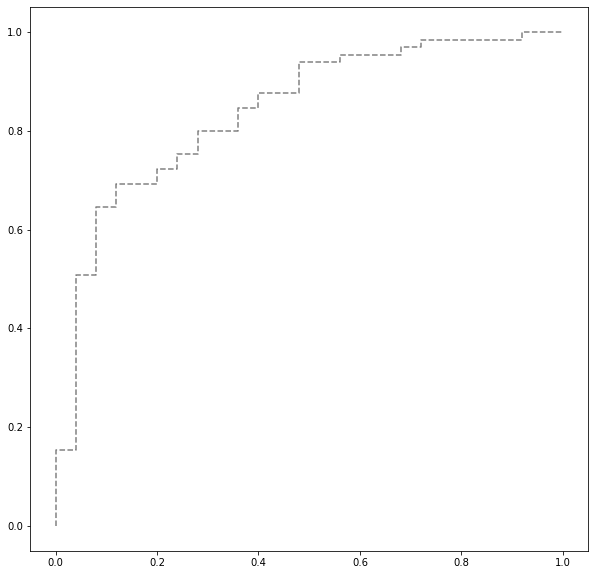

In [39]:
#Hard Voting

from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix, matthews_corrcoef

# Loop through each dataset
for dataset in ['sider_cardiacdisorders', 'cardiotox_with_sider_inactives',
       'cardiotox_with_sider_all', 'cardiotox_with_sider_actives',
       'DICTrank']:
    print(dataset)
    df_dataset = allresults[allresults["Dataset"] == dataset]
    
    plt.figure(figsize=(10, 10))
    
    # Group by SMILES
    grouped = df_dataset.groupby('SMILES')

    # Collect ensemble predictions
    ensemble_probabilities_dict = {}

   # Iterate over each unique SMILES
    for smiles, group in grouped:
        # Mean of the scaled probabilities
        #ensemble_proba = group['Scaled_Probability'].median()
        ensemble_proba = group[group.Features.isin(["str_results", "pid_results", 
                               "phy_results", "moa_results"])]['Scaled_Probability'].mean()
        ensemble_proba_dict[smiles] = ensemble_proba


    # Convert ensemble_proba_dict to a list corresponding to the original order in df_dataset
    ensemble_probabilities = df_dataset['SMILES'].map(ensemble_proba_dict).tolist()

    # Convert ensemble_proba_dict to ensemble predictions based on threshold
    ensemble_predictions_dict = {smiles: (1 if proba > 0.5 else 0) for smiles, proba in ensemble_proba_dict.items()}
    ensemble_predictions = df_dataset['SMILES'].map(ensemble_predictions_dict).tolist()

    # Assuming the ensemble_predictions list and df_dataset["True_Value"] have been generated from the previous code...

    # Balanced Accuracy (BA)
    ba = balanced_accuracy_score(df_dataset["True_Value"], ensemble_predictions)
    # Sensitivity (Sen) & Specificity (Spe)
    tn, fp, fn, tp = confusion_matrix(df_dataset["True_Value"], ensemble_predictions).ravel()
    sen = tp / (tp + fn)
    spe = tn / (tn + fp)
    # F1 score
    f1 = f1_score(df_dataset["True_Value"], ensemble_predictions)
    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(df_dataset["True_Value"], ensemble_predictions)

    print(f"Balanced Accuracy (BA): {ba:.2f}")
    print(f"Sensitivity (Sen): {sen:.2f}")
    print(f"Specificity (Spe): {spe:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

    fpr, tpr, _ = roc_curve(df_dataset["True_Value"], ensemble_probabilities)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Ensemble All models (AUC = {roc_auc:.2f})', color='gray', linestyle='dashed' )

    print(roc_auc)
    plt.show()